# Importing Packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS

# Loading Data

In [3]:
jobs = pd.read_csv("Final_Train_Dataset.csv")
jobs.head()

,Unnamed: 0,experience,job_description,job_desig,job_type,key_skills,location,salary,company_name_encoded
0,0,5-7 yrs,Exp: Minimum 5 years;Good understanding of IOC...,Senior Exploit and Vulnerability Researcher,NaN,"team skills, communication skills, analytical ...",Delhi NCR(Vikas Puri),6to10,3687
1,1,10-17 yrs,He should have handled a team of atleast 5-6 d...,Head SCM,NaN,"ppc, logistics, inventory management, supply c...",Sonepat,10to15,458
2,2,5-9 yrs,Must be an effective communicator (written & s...,Deputy Manager - Talent Management & Leadershi...,Analytics,"HR Analytics, Employee Engagement, Training, S...",Delhi NCR,15to25,4195
3,3,7-10 yrs,7 - 10 years of overall experience in data e...,Associate Manager Data Engineering,Analytics,"SQL, Javascript, Automation, Python, Ruby, Ana...",Bengaluru,10to15,313
4,4,1-3 yrs,Chartered Accountancy degree or MBA in Finance...,TS- GSA- Senior Analyst,NaN,"accounting, finance, cash flow, financial plan...",Gurgaon,3to6,1305


In [4]:
jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19802 entries, 0 to 19801
Data columns (total 9 columns):
Unnamed: 0              19802 non-null int64
experience              19802 non-null object
job_description         15384 non-null object
job_desig               19802 non-null object
job_type                4797 non-null object
key_skills              19801 non-null object
location                19802 non-null object
salary                  19802 non-null object
company_name_encoded    19802 non-null int64
dtypes: int64(2), object(7)
memory usage: 1.4+ MB


# Preprocessing

In [5]:
jobs.drop("Unnamed: 0", axis =1, inplace = True)

In [6]:
jobs.shape

(19802, 8)

In [7]:
def locationProcessor(name):
    name = name.lower()
    if "ahmedabad" in name:
        name = "ahmedabad"
    elif "mumbai" in name:
        name = "mumbai"
    elif "bengaluru" in name:
        name = "bengaluru"
    elif "bengalore" in name:
        name = "bengaluru"
    elif "pune" in name:
        name = "pune"
    elif "chennai" in name:
        name = "chennai"
    elif "delhi ncr" in name:
        name = "delhi ncr"
    elif "delhi" in name:
        name = "delhi"
    elif "ghaziabad" in name:
        name = "ghaziabad"
    elif "greater noida" in name:
        name = "greater noida"
    elif "gurgaon" in name:
        name = "gurgaon"
    elif "hyderabad" in name:
        name = "hyderabad"
    elif "kolkata" in name:
        name = "kolkata"
    elif "noida" in name:
        name = "noida"
    else:
        name= "other"
    return name

# Analysis

In [8]:
number_of_jobs = jobs.shape[0]
number_of_companies = len(jobs["company_name_encoded"].unique())
print("The dataset contains %d jobs from %d different companies" %(number_of_jobs,number_of_companies))

The dataset contains 19802 jobs from 5035 different companies


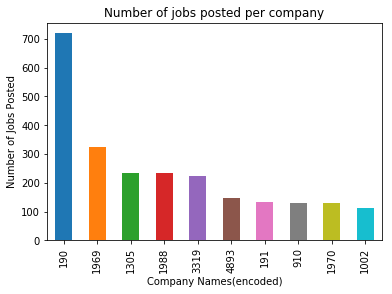

In [23]:
jobs['company_name_encoded'].value_counts()[:10].plot(kind = 'bar')
plt.ylabel('Number of Jobs Posted')
plt.xlabel('Company Names(encoded)')
plt.title('Number of jobs posted per company')
plt.show()

In [10]:
designations = np.array(jobs["job_desig"]).flatten().tolist() 
designations_word_corpus = ' '.join(designations)

In [11]:
stopwords = STOPWORDS.union(set(jobs.location.tolist()))

In [12]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                stopwords = stopwords, 
                min_font_size = 10).generate(designations_word_corpus)

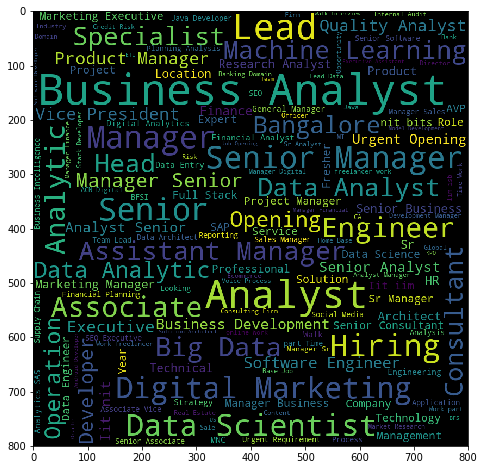

In [13]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 

In [14]:
skills = np.array(jobs[jobs["key_skills"].notnull()]["key_skills"]).flatten()
skills_word_corpus = ' '.join(skills)

In [15]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                stopwords = stopwords, 
                min_font_size = 10).generate(skills_word_corpus)

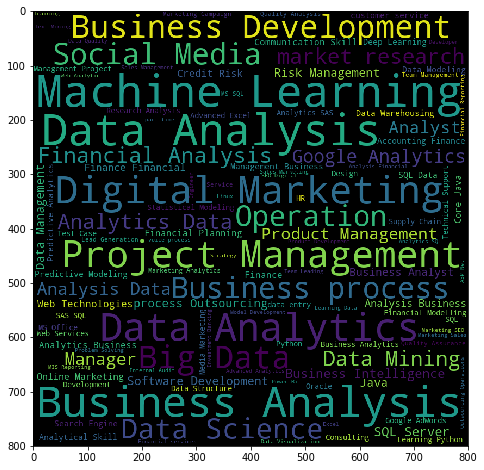

In [16]:
plt.figure(figsize=(8,8), facecolor = None)
plt.imshow(wordcloud)

In [34]:
description = np.array(jobs[jobs['job_description'].notnull()]['job_description']).flatten()
description_word_corpus = (' '.join(description)).lower()

In [36]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                stopwords = stopwords, 
                min_font_size = 10).generate(description_word_corpus)

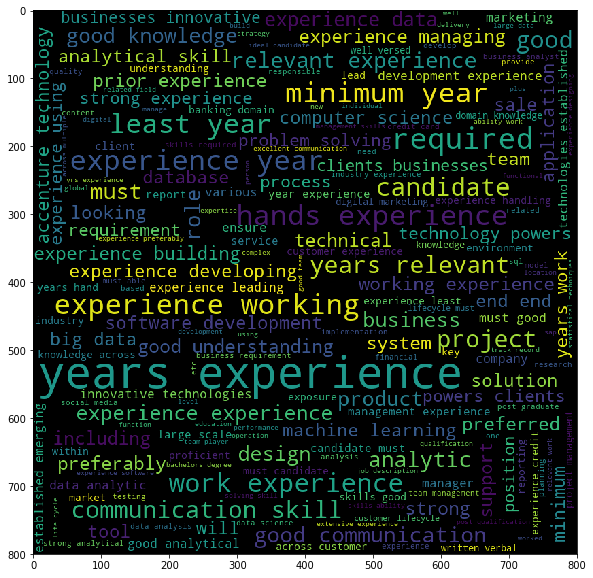

In [38]:
plt.figure(figsize=(10,10), facecolor = None)
plt.imshow(wordcloud)

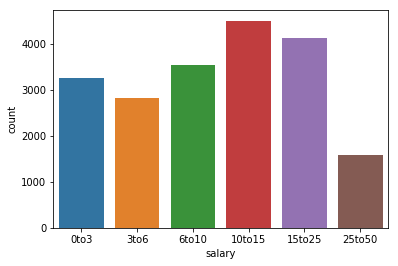

In [17]:
sns.countplot(x = 'salary', data = jobs,order=['0to3','3to6','6to10','10to15','15to25','25to50'])

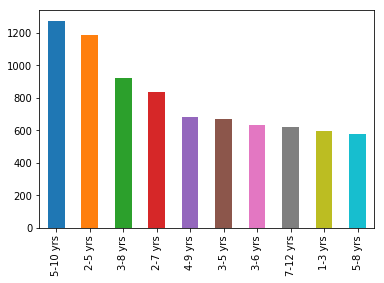

In [18]:
jobs["experience"].value_counts()[:10].plot(kind = 'bar')

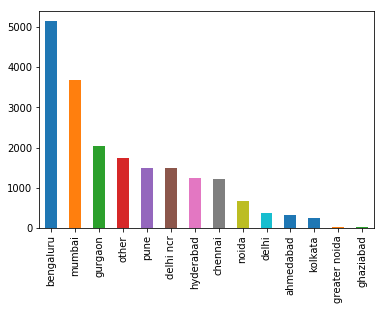

In [19]:
location = jobs['location'].tolist()
locations = [x.strip() for loc in location for x in loc.split(',')]
location2 = list(map(locationProcessor, location))
locs = pd.Series(location2)
locs.value_counts().plot.bar()

In [41]:
entry_level = jobs[jobs['experience'].str.startswith('0')]

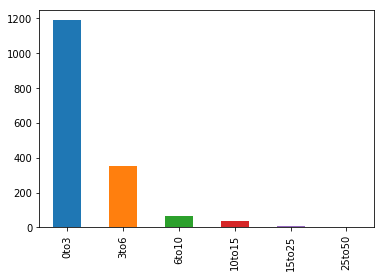

In [42]:
entry_level['salary'].value_counts().plot(kind = 'bar')

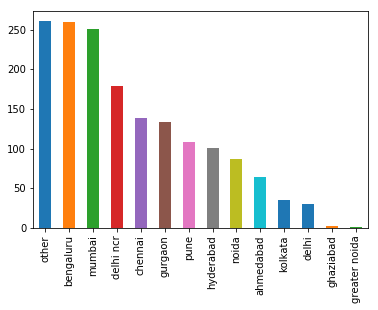

In [43]:
location = entry_level['location'].tolist()
locations = [x.strip() for loc in location for x in loc.split(',')]
location2 = list(map(locationProcessor, location))
locs = pd.Series(location2)
locs.value_counts().plot.bar()

In [44]:
skills = np.array(entry_level[entry_level["key_skills"].notnull()]["key_skills"]).flatten()
skills_word_corpus = ' '.join(skills)

In [45]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                stopwords = stopwords, 
                min_font_size = 10).generate(skills_word_corpus)

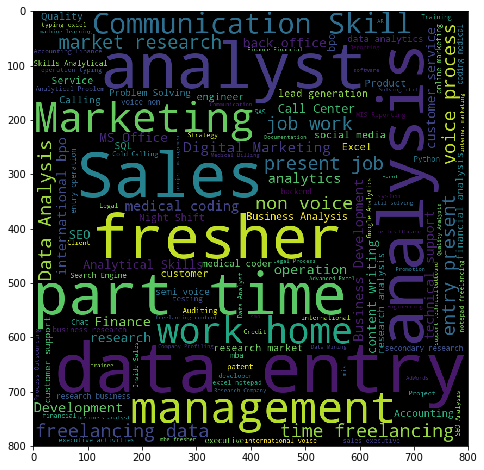

In [47]:
plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wordcloud)